In [18]:
using Plots
using LaTeXStrings
using BoundaryValueDiffEq
using Printf

In [19]:
domain = (0.0, 1.0)
ϵ = 0.01;

In [20]:
function prob1!(dv, v, p, x)
    u = v[1]
    du = v[2]
    dv[1] = du
    dv[2] = -(du + u) / ϵ
end

prob1! (generic function with 1 method)

In [21]:
# Boundary conditions
function bc1!(residual, u, p, t)
    residual[1] = u[1][1] - 1
    residual[2] = u[end][1] - 2
end

bc1! (generic function with 1 method)

In [22]:
# Define the problem and solve for the current epsilon
u0 = [1.0, 0.0]
bvp = BVProblem(prob1!, bc1!, u0, domain)
sol = solve(bvp, MIRK4(), dt = 0.01);

In [23]:
x = collect(LinRange(0,1,1000))
A = 2*ℯ - 1
B(x) = x*(2*ℯ-1-(1/ϵ))
z(x) = x / ϵ
composite1(x, ϵ) = 2*exp(1-x)+(1-2*ℯ)*exp(-x/ϵ); # simplified
compmatch1 = 2*ℯ
composite2(x, ϵ) = -2*exp(1-x)*(x-1) + A*(-z(x)*(exp(-z(x))+1)+(1-exp(-z(x))))+ B(x)*(1-exp(-z(x))) - z(x)
compmatch2(x, ϵ) = 2*ℯ + 2*ℯ*ϵ

bigcomp(x, ϵ) = composite1(x, ϵ) - compmatch1 + ϵ*composite2(x, ϵ) - ϵ*compmatch(x, ϵ) 

bigcomp (generic function with 1 method)

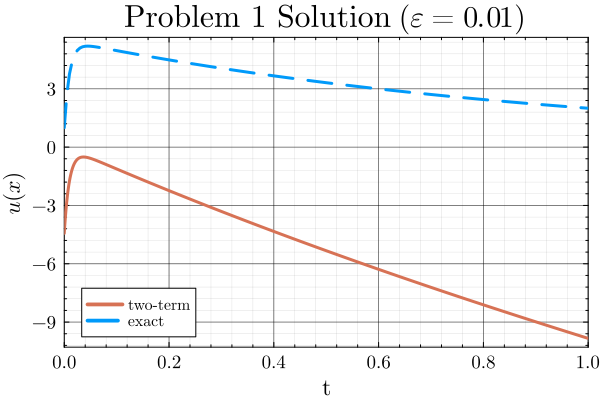

In [24]:
theme(:dao::Symbol)
plt = plot(x, bigcomp.(x, ϵ),
    label="two-term",
    xlabel = L"$x$",  # Explicitly set the x-axis label
    ylabel = L"$u(x)$",
    title = "Problem 1 Solution "*L"$(\varepsilon=%$ϵ)$",
    legend = :best,
    titlefontsize = 20,
    tickfontsize = 12,
    legendfontsize = 10,
    yguidefontsize = 15,
    xguidefontsize = 15,
    line = (3, :solid))
plot!(plt, sol,
    idxs = [1],
    label = "exact",
    line = (3, :dash))
plt